In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)  

Ntrain = 1000
Nval = 1000
Ntest = 100

## ECON 

In [8]:
datasets = ['EconDensity', 'ArmaJump', 'SkewNormal']

dataset = 'EconDensity'
all_results = {}
for model in ['NCP_32tanh', 'NCP_32relu', 'KernelMixtureNetwork', 'MixtureDensityNetwork', 'NormalizingFlowEstimator_32tanh', 'NormalizingFlowEstimator_32relu', 'ConditionalKernelDensityEstimation', 'LSConditionalDensityEstimation']:
    results_df = pd.read_pickle(f'{dataset}_{model}_results.pkl')
    #take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
    grouped_results = pd.DataFrame()
    for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
        if model in ['NCP_32tanh', 'NCP_32relu']:
            tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.mean))
            tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
            tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x:np.nanmedian(np.row_stack(x), axis=1)).apply(np.median)
            # tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.std)
            tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))       
        else:
            tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.mean))
            tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
            tmp_grouping['median_'+metric] = results_df.groupby(['n_samples'])[metric].apply(lambda x:np.nanmedian(np.row_stack(x), axis=1)).apply(np.median)
            tmp_grouping['std_'+metric] = results_df.groupby(['n_samples'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.std)

        grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)

    all_results[model] = grouped_results.reset_index()

    # locals()[f'{model}_results'] = grouped_results.reset_index()

In [24]:
results_df = pd.read_pickle('EconDensity_NCP_32tanh_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.mean))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x:np.nanmedian(np.row_stack(x), axis=1)).apply(np.median)
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(np.row_stack(x), axis=1)).apply(np.std)
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_results = grouped_results.reset_index()

In [25]:
results_df.hellinger[0]

[array([2.22616417, 2.27629953, 2.223926  , 1.98674917, 1.66740182,
        1.17330934, 0.87529049, 0.80013213, 1.18649911, 1.63140504])]

In [26]:
results_df = pd.read_pickle('EconDensity_NCP_32relu_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_ReLU_results = grouped_results.reset_index()

In [27]:
results_df.hellinger[0]

[array([2.22616417, 2.27629953, 2.223926  , 1.986749  , 1.66740182,
        1.17330926, 0.87529041, 0.80013238, 1.18649911, 1.63140521])]

In [7]:
results_df = pd.read_pickle('EconDensity_KernelMixtureNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
KMN_results = grouped_results.reset_index()

In [8]:
results_df = pd.read_pickle('EconDensity_MixtureDensityNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
MDN_results = grouped_results.reset_index()

In [9]:
results_df = pd.read_pickle('EconDensity_NormalizingFlowEstimator_16tanh_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NF16tanh_results = grouped_results.reset_index()

In [10]:
results_df = pd.read_pickle('EconDensity_NormalizingFlowEstimator_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NF32relu_results = grouped_results.reset_index()

In [11]:
results_df = pd.read_pickle('EconDensity_ConditionalKernelDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
CKDE_results = grouped_results.reset_index()

In [12]:
results_df = pd.read_pickle('EconDensity_LSConditionalDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
LSCDE_results = grouped_results.reset_index()

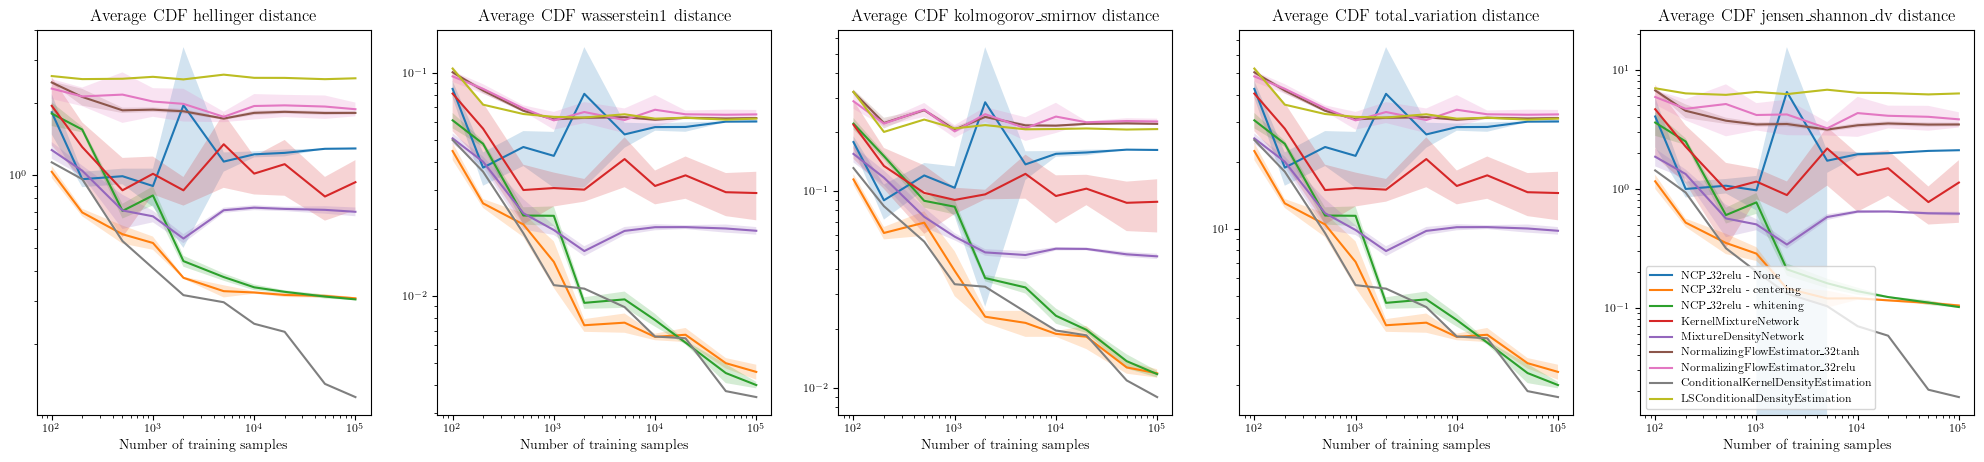

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
all_models = ['NCP_32tanh', 'NCP_32relu', 'KernelMixtureNetwork', 'MixtureDensityNetwork', 'NormalizingFlowEstimator_32tanh', 'NormalizingFlowEstimator_32relu', 'ConditionalKernelDensityEstimation', 'LSConditionalDensityEstimation']
models2plot = ['NCP_32tanh']
models2plot = ['NCP_32relu', 'KernelMixtureNetwork', 'MixtureDensityNetwork', 'NormalizingFlowEstimator_32tanh', 'NormalizingFlowEstimator_32relu', 'ConditionalKernelDensityEstimation', 'LSConditionalDensityEstimation']

for i, metric in enumerate(['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']):
    ax = axs[i]
    
    for model in models2plot:
        results = all_results[model]
        if model in ['NCP_32tanh', 'NCP_32relu']:
            for postprocess in ['None', 'centering', 'whitening']:
                n_samples = results[results['postprocess'] == postprocess]['n_samples']
                mean_score = results[results['postprocess'] == postprocess]['mean_'+metric]
                std_score = results[results['postprocess'] == postprocess]['std_'+metric]
                ax.plot(n_samples, mean_score, label= model +' - ' + postprocess)
                ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
        else:
            n_samples = results['n_samples']
            mean_score = results['mean_'+metric]
            std_score = results['std_'+metric]
            ax.plot(n_samples, mean_score, label=model)
            ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)

        # n_samples = NCP_32tanh_results[NCP_32tanh_results['postprocess'] == postprocess]['n_samples']
        # mean_score = NCP_32tanh_results[NCP_32tanh_results['postprocess'] == postprocess]['mean_'+metric]
        # std_score = NCP_32tanh_results[NCP_32tanh_results['postprocess'] == postprocess]['std_'+metric]
        # ax.plot(n_samples, mean_score, label='NCP (ReLU) - ' + postprocess)
        # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
        
    # n_samples = KMN_results['n_samples']
    # mean_score = KMN_results['mean_'+metric]
    # std_score = KMN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='KMN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = MDN_results['n_samples']
    # mean_score = MDN_results['mean_'+metric]
    # std_score = MDN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='MDN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = NF16tanh_results['n_samples']
    # mean_score = NF16tanh_results['mean_'+metric]
    # std_score = NF16tanh_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='NF (16 - Tanh)')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = NF32relu_results['n_samples']
    # mean_score = NF32relu_results['mean_'+metric]
    # std_score = NF32relu_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='NF (32 - Relu)')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    
    # 
    # n_samples = CKDE_results['n_samples']
    # mean_score = CKDE_results['mean_'+metric]
    # std_score = CKDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='CKDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = LSCDE_results['n_samples']
    # mean_score = LSCDE_results['mean_'+metric]
    # std_score = LSCDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='LSCDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)

    ax.set_title(f'Average CDF {metric} distance')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Number of training samples')
    
plt.legend()
plt.show()

## ARMA Jump 

In [37]:
results_df = pd.read_pickle('ArmaJump_NCP_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.mean(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_results = grouped_results.reset_index()

In [38]:
results_df = pd.read_pickle('ArmaJump_NCP_ReLU_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.nanmean(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_ReLU_results = grouped_results.reset_index()

In [28]:
results_df = pd.read_pickle('ArmaJump_KernelMixtureNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
KMN_results = grouped_results.reset_index()

In [29]:
results_df = pd.read_pickle('ArmaJump_MixtureDensityNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
MDN_results = grouped_results.reset_index()

In [30]:
results_df = pd.read_pickle('ArmaJump_NormalizingFlowEstimator_16tanh_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NF16tanh_results = grouped_results.reset_index()

In [31]:
results_df = pd.read_pickle('ArmaJump_NormalizingFlowEstimator_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NF32relu_results = grouped_results.reset_index()

In [32]:
results_df = pd.read_pickle('ArmaJump_ConditionalKernelDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
CKDE_results = grouped_results.reset_index()

In [33]:
results_df = pd.read_pickle('ArmaJump_LSConditionalDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
LSCDE_results = grouped_results.reset_index()

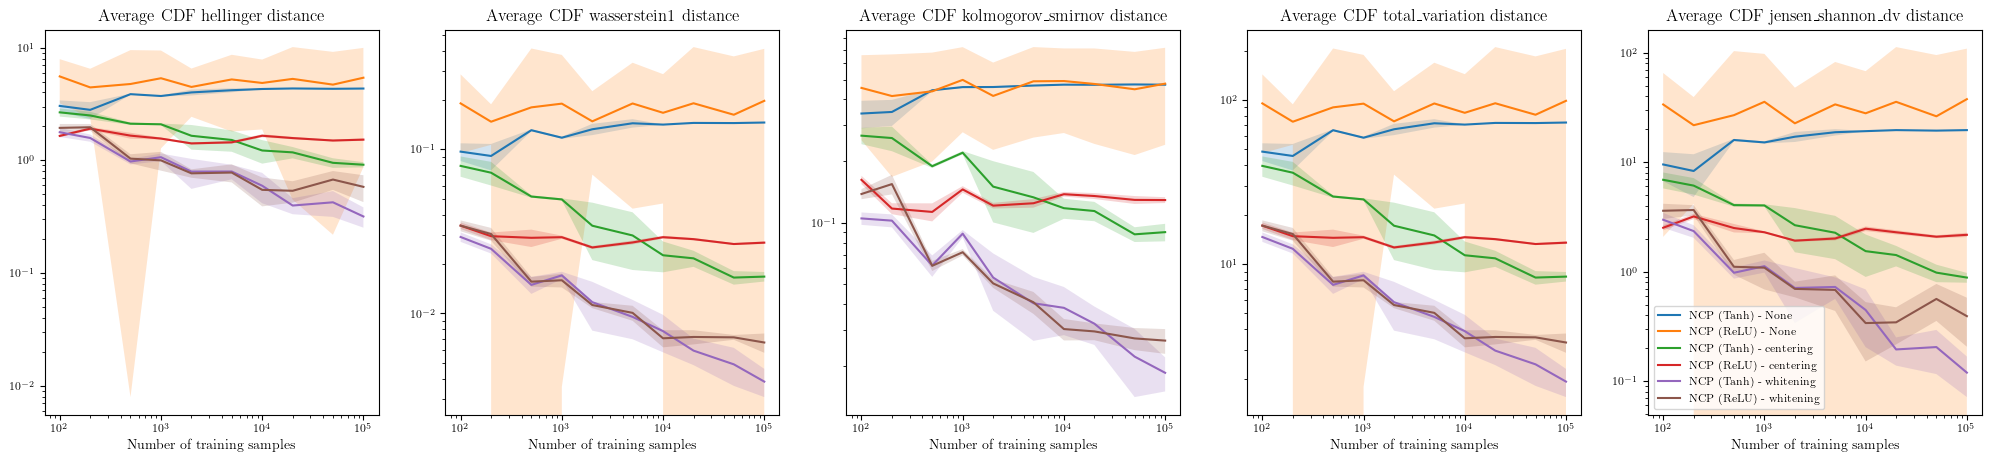

In [39]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, metric in enumerate(['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']):
    ax = axs[i]
    for postprocess in ['None', 'centering', 'whitening']:
        n_samples = NCP_results[NCP_results['postprocess'] == postprocess]['n_samples']
        mean_score = NCP_results[NCP_results['postprocess'] == postprocess]['mean_'+metric]
        std_score = NCP_results[NCP_results['postprocess'] == postprocess]['std_'+metric]
        ax.plot(n_samples, mean_score, label='NCP (Tanh) - ' + postprocess)
        ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)

        n_samples = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['n_samples']
        mean_score = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['mean_'+metric]
        std_score = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['std_'+metric]
        ax.plot(n_samples, mean_score, label='NCP (ReLU) - ' + postprocess)
        ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)

    # n_samples = KMN_results['n_samples']
    # mean_score = KMN_results['mean_'+metric]
    # std_score = KMN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='KMN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = MDN_results['n_samples']
    # mean_score = MDN_results['mean_'+metric]
    # std_score = MDN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='MDN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = NF16tanh_results['n_samples']
    # mean_score = NF16tanh_results['mean_'+metric]
    # std_score = NF16tanh_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='NF (16 - Tanh)')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = NF32relu_results['n_samples']
    # mean_score = NF32relu_results['mean_'+metric]
    # std_score = NF32relu_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='NF (32 - Relu)')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = CKDE_results['n_samples']
    # mean_score = CKDE_results['mean_'+metric]
    # std_score = CKDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='CKDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = LSCDE_results['n_samples']
    # mean_score = LSCDE_results['mean_'+metric]
    # std_score = LSCDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='LSCDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    
    ax.set_title(f'Average CDF {metric} distance')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Number of training samples')
    
plt.legend()
plt.show()

## SkewNormal

In [42]:
results_df = pd.read_pickle('SkewNormal_NCP_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.mean(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_results = grouped_results.reset_index()

In [43]:
results_df = pd.read_pickle('SkewNormal_NCP_ReLU_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples', 'postprocess'])[metric].apply(lambda x: np.nanmean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.nanmean(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NCP_ReLU_results = grouped_results.reset_index()

/tmp/ipykernel_5956/1659402894.py:7: RuntimeWarning: All-NaN slice encountered
  tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.nanmean(list(x)))
/tmp/ipykernel_5956/1659402894.py:8: RuntimeWarning: Mean of empty slice
  tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmean(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.std(list(x)))
/tmp/ipykernel_5956/1659402894.py:7: RuntimeWarning: All-NaN slice encountered
  tmp_grouping['median_'+metric] = results_df.groupby(['n_samples', 'postprocess','seed'])[metric].apply(lambda x: np.nanmedian(list(x))).groupby(['n_samples', 'postprocess']).apply(lambda x: np.nanmean(list(x)))
/tmp/ipykernel_5956/1659402894.py:8: RuntimeWarning: Mean of empty slice
  tmp_grouping['std_'+metric] = results_df.groupby(['n_samples', '

In [73]:
results_df = pd.read_pickle('SkewNormal_KernelMixtureNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
KMN_results = grouped_results.reset_index()

In [74]:
results_df = pd.read_pickle('SkewNormal_MixtureDensityNetwork_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
MDN_results = grouped_results.reset_index()

In [75]:
results_df = pd.read_pickle('SkewNormal_NormalizingFlowEstimator_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
NF_results = grouped_results.reset_index()

In [76]:
results_df = pd.read_pickle('SkewNormal_ConditionalKernelDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
CKDE_results = grouped_results.reset_index()

In [77]:
results_df = pd.read_pickle('SkewNormal_LSConditionalDensityEstimation_results.pkl')
#take results_pd, group by n_samples and postprocess, apply np.mean and np.std to scores_pdf and create a new dataframe with the results
grouped_results = pd.DataFrame()
for metric in ['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']:
    tmp_grouping = pd.DataFrame(results_df.groupby(['n_samples'])[metric].apply(lambda x: np.mean(list(x))))
    tmp_grouping.rename(columns={metric: 'mean_'+metric}, inplace=True)
    tmp_grouping['median_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.median(list(x))).groupby(['n_samples']).apply(lambda x: np.median(list(x)))
    tmp_grouping['std_'+metric] = results_df.groupby(['n_samples','seed'])[metric].apply(lambda x: np.mean(list(x))).groupby(['n_samples']).apply(lambda x: np.std(list(x)))
    grouped_results = pd.concat([grouped_results, tmp_grouping], axis=1)
    
LSCDE_results = grouped_results.reset_index()

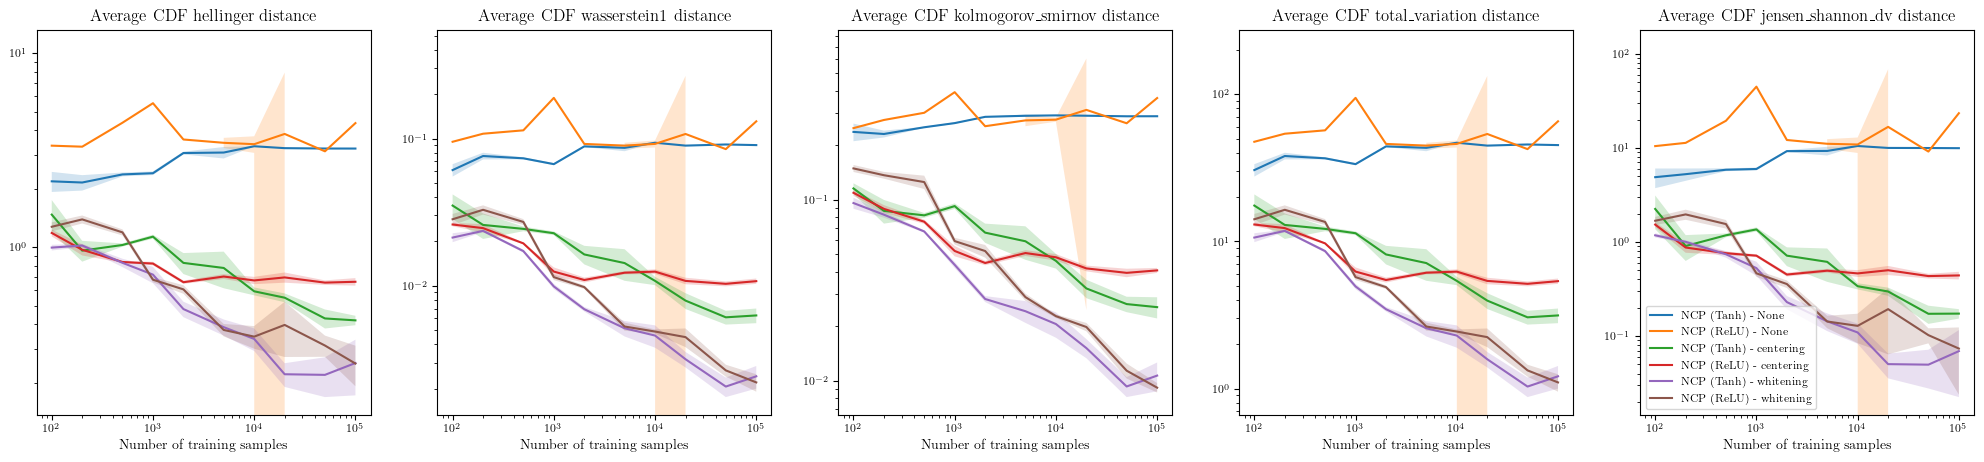

In [44]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, metric in enumerate(['hellinger', 'wasserstein1', 'kolmogorov_smirnov', 'total_variation', 'jensen_shannon_dv']):
    ax = axs[i]
    for postprocess in ['None', 'centering', 'whitening']:
        n_samples = NCP_results[NCP_results['postprocess'] == postprocess]['n_samples']
        mean_score = NCP_results[NCP_results['postprocess'] == postprocess]['mean_'+metric]
        std_score = NCP_results[NCP_results['postprocess'] == postprocess]['std_'+metric]
        ax.plot(n_samples, mean_score, label='NCP (Tanh) - ' + postprocess)
        ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
        
        n_samples = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['n_samples']
        mean_score = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['mean_'+metric]
        std_score = NCP_ReLU_results[NCP_ReLU_results['postprocess'] == postprocess]['std_'+metric]
        ax.plot(n_samples, mean_score, label='NCP (ReLU) - ' + postprocess)
        ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
        

    # n_samples = KMN_results['n_samples']
    # mean_score = KMN_results['mean_'+metric]
    # std_score = KMN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='KMN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = MDN_results['n_samples']
    # mean_score = MDN_results['mean_'+metric]
    # std_score = MDN_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='MDN')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = NF_results['n_samples']
    # mean_score = NF_results['mean_'+metric]
    # std_score = NF_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='NF')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = CKDE_results['n_samples']
    # mean_score = CKDE_results['mean_'+metric]
    # std_score = CKDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='CKDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    # n_samples = LSCDE_results['n_samples']
    # mean_score = LSCDE_results['mean_'+metric]
    # std_score = LSCDE_results['std_'+metric]
    # ax.plot(n_samples, mean_score, label='LSCDE')
    # ax.fill_between(n_samples, mean_score - std_score, mean_score + std_score, alpha=0.2)
    # 
    ax.set_title(f'Average CDF {metric} distance')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Number of training samples')
    
plt.legend()
plt.show()